In [28]:
import os
import sys
import numpy as np
PROJECT_PATH = os.path.abspath(
    os.path.join(os.path.dirname('__file__'), '..'))
sys.path.append(PROJECT_PATH)
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [29]:
def _save_histogram(self, score_metric_dict, score_name, dataset_name,
    class_name, save_folder_path=None):
  if save_folder_path is None:
    return
  # TODO: refactor usage of percentile, include it in metrics and
  #  get it from key
  # percentile = 95.46
  scores_val = score_metric_dict['scores_val']
  auc_roc = score_metric_dict['roc_auc']
  accuracies = score_metric_dict['accuracies']
  scores = score_metric_dict['scores']
  labels = score_metric_dict['labels']
  thresholds = score_metric_dict['roc_thresholds']
  accuracy_at_percentile = score_metric_dict['acc_at_percentil']
  inliers_scores = scores[labels == 1]
  outliers_scores = scores[labels != 1]
  min_score = np.min(scores)
  max_score = np.max(scores)
  thr_percentile = np.percentile(scores_val, 100 - self.percentile)
  fig = plt.figure(figsize=(8, 6))
  ax_hist = fig.add_subplot(111)
  ax_hist.set_title(
      'AUC_ROC: %.2f%%, BEST ACC: %.2f%%' % (
        auc_roc * 100, np.max(accuracies) * 100))
  ax_acc = ax_hist.twinx()
  hist1 = ax_hist.hist(inliers_scores, 300, alpha=0.5,
                       label='inlier', range=[min_score, max_score])
  hist2 = ax_hist.hist(outliers_scores, 300, alpha=0.5,
                       label='outlier', range=[min_score, max_score])
  ax_hist.set_yscale('log')
  _, max_ = ax_hist.set_ylim()
  ax_hist.set_ylabel('Counts', fontsize=12)
  ax_hist.set_xlabel(score_name, fontsize=12)
  # acc plot
  ax_acc.set_ylim([0.5, 1.0])
  ax_acc.yaxis.set_ticks(np.arange(0.5, 1.05, 0.05))
  ax_acc.set_ylabel('Accuracy', fontsize=12)
  acc_plot = ax_acc.plot(thresholds, accuracies, lw=2,
                         label='Accuracy by\nthresholds',
                         color='black')
  percentil_plot = ax_hist.plot([thr_percentile, thr_percentile], [0, max_],
                                'k--',
                                label='thr percentil %i on %s' % (
                                  self.percentile, dataset_name))
  ax_hist.text(thr_percentile,
               max_ * 0.6,
               'Acc: {:.2f}%'.format(accuracy_at_percentile * 100))
  ax_acc.grid(ls='--')
  fig.legend(loc="upper right", bbox_to_anchor=(1, 1),
             bbox_transform=ax_hist.transAxes)
  results_name = self._get_score_result_name(score_name, dataset_name,
                                             class_name)
  fig.savefig(
      os.path.join(save_folder_path, '%s_hist_thr_acc.png' % results_name),
      bbox_inches='tight')
  plt.close()
  

def save_histogram(score_metric_dict, score_name, dataset_name,
    class_name):

  # TODO: refactor usage of percentile, include it in metrics and
  #  get it from key
  percentile = 0.977
  scores_val = score_metric_dict['scores_val']
  auc_roc = score_metric_dict['roc_auc']
  accuracies = score_metric_dict['accuracies']
  scores = score_metric_dict['scores']
  labels = score_metric_dict['labels']
  thresholds = score_metric_dict['roc_thresholds']
  accuracy_at_percentile = score_metric_dict['acc_at_percentil']
  inliers_scores = scores[labels == 1]
  outliers_scores = scores[labels != 1]
  min_score = np.min(scores)
  max_score = np.max(scores)
  thr_percentile = np.percentile(scores_val, 100 - percentile)
  fig = plt.figure(figsize=(8, 6))
  ax_hist = fig.add_subplot(111)
  ax_hist.set_title(
      'AUC_ROC: %.2f%%, BEST ACC: %.2f%%' % (
        auc_roc * 100, np.max(accuracies) * 100))
  ax_acc = ax_hist.twinx()
  hist1 = ax_hist.hist(inliers_scores, 300, alpha=0.5,
                       label='inlier', range=[min_score, max_score])
  hist2 = ax_hist.hist(outliers_scores, 300, alpha=0.5,
                       label='outlier', range=[min_score, max_score])
  ax_hist.set_yscale('log')
  _, max_ = ax_hist.set_ylim()
  ax_hist.set_ylabel('Counts', fontsize=12)
  ax_hist.set_xlabel(score_name, fontsize=12)
  # acc plot
  ax_acc.set_ylim([0.5, 1.0])
  ax_acc.yaxis.set_ticks(np.arange(0.5, 1.05, 0.05))
  ax_acc.set_ylabel('Accuracy', fontsize=12)
  acc_plot = ax_acc.plot(thresholds, accuracies, lw=2,
                         label='Accuracy by\nthresholds',
                         color='black')
  percentil_plot = ax_hist.plot([thr_percentile, thr_percentile], [0, max_],
                                'k--',
                                label='thr percentil %i on %s' % (
                                  percentile, dataset_name))
  ax_hist.text(thr_percentile,
               max_ * 0.6,
               'Acc: {:.2f}%'.format(accuracy_at_percentile * 100))
  
  fig.legend(loc="upper right", bbox_to_anchor=(1, 1),
             bbox_transform=ax_hist.transAxes)

  # fig.savefig(
  #     os.path.join(save_folder_path, '%s_hist_thr_acc.png' % results_name),
  #     bbox_inches='tight')
  plt.show()
# save_histogram(data_dict, 'diri', 'ztf', 'bogus')

In [30]:
def out_histogram(score_metric_dict, 
    score_name='Dirichlet Normality Score', bins=300, scale=1.5, alpha=0.6, fontsize=12):
  auc_roc = score_metric_dict['roc_auc']
  scores = score_metric_dict['scores']
  labels = score_metric_dict['labels']
  inliers_scores = scores[labels == 1]
  outliers_scores = scores[labels != 1]
  min_score = np.min(scores)
  max_score = np.max(scores)
  fig = plt.figure(figsize=(scale*4.5, scale*3))
  ax_hist = fig.add_subplot(111)
  ax_hist.set_title(
      'AUROC: %.2f%%' % (
        auc_roc * 100), fontsize=fontsize)
  ax_hist.grid(ls='--')
  ax_hist.hist(outliers_scores, bins, alpha=alpha,
                       label='outliers', range=[min_score, max_score])
  ax_hist.hist(inliers_scores, bins, alpha=alpha, 
                       label='inliers', range=[min_score, max_score])
  
  ax_hist.set_yscale('log')
  _, max_ = ax_hist.set_ylim()
  ax_hist.set_ylabel('Counts', fontsize=fontsize)
  ax_hist.set_xlabel(score_name, fontsize=fontsize)
  fig.legend(loc="upper left", bbox_to_anchor=(0, 1),
             bbox_transform=ax_hist.transAxes, fontsize=fontsize
             )
  fig.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/out_hist.svg'),
                  format='svg', dpi=1200, bbox_inches = 'tight', pad_inches = 0,
                  transparent=True)
  plt.show()


def zoom_histogram(score_metric_dict, 
    score_name='Dirichlet Normality Score', bins=300, 
    scale=1.5, alpha=0.6, fontsize=12, 
    percentile_perc=0.5):
  percentile = 95.46
  scores_val = score_metric_dict['scores_val']
  auc_roc = score_metric_dict['roc_auc']
  accuracies = score_metric_dict['accuracies']
  scores = score_metric_dict['scores']
  labels = score_metric_dict['labels']
  thresholds = score_metric_dict['roc_thresholds']
  accuracy_at_percentile = score_metric_dict['acc_at_percentil']
  inliers_scores = scores[labels == 1]
  outliers_scores = scores[labels != 1]
  plot_percentile = np.percentile(inliers_scores, percentile_perc)
  print(plot_percentile)
  min_score = plot_percentile
  max_score = np.max(scores)
  
  thr_percentile = np.percentile(scores_val, 100-percentile)
  print(thr_percentile)
  fig = plt.figure(figsize=(scale*4.5, scale*3))
  ax_hist = fig.add_subplot(111)
  ax_hist.set_title(
      'AUROC: %.2f%%, Best Accuracy: %.2f%%' % (
        auc_roc * 100, np.max(accuracies) * 100))
  ax_acc = ax_hist.twinx()
  ax_hist.hist(outliers_scores, bins, alpha=alpha,
                       label='outliers', range=[min_score, max_score])
  ax_hist.hist(inliers_scores, bins, alpha=alpha, 
                       label='inliers', range=[min_score, max_score])
  
  #ax_hist.set_yscale('log')
  _, max_ = ax_hist.set_ylim()
  hist_min, hist_max = ax_hist.set_xlim()
  ax_hist.set_ylabel('Counts', fontsize=fontsize)
  ax_hist.set_xlabel(score_name, fontsize=fontsize)
  # acc plot
  ax_acc.set_ylim([0.5, 1.0])
  ax_acc.yaxis.set_ticks(np.arange(0.5, 1.05, 0.05))
  ax_acc.set_ylabel('Accuracy', fontsize=12)
  acc_plot = ax_acc.plot(thresholds, accuracies, lw=2,
                         label='Accuracy by thresholds',
                         color='black')
  percentil_plot = ax_hist.plot([thr_percentile, thr_percentile], [0, max_],
                                'k--',
                                label='threshold percentil %.1f\non %s' % (
                                  97.7, 'validation inliers'))
  ax_hist.text(thr_percentile - thr_percentile*0.62,
               max_ * 0.45,
               'Accuracy: {:.2f}%'.format(accuracy_at_percentile * 100))
  fig.legend(loc="upper left", bbox_to_anchor=(0, 1),
             bbox_transform=ax_hist.transAxes, fontsize=fontsize
             )
  ax_hist.set_xlim(hist_min,hist_max)
  ax_acc.grid(ls='--')

  fig.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/zoom_hist.svg'),
                  format='svg', dpi=1200, bbox_inches = 'tight', pad_inches = 0,
                  transparent=True)
  plt.show()

In [31]:
data_path = os.path.join(
    PROJECT_PATH, 'figure_creation','aux',
    'small-ztf-PlusKernel-Transformer-after-selection-29_Transformer-OD-Model-dirichlet_real_20200131-163906.npz')
data_dict = dict(np.load(data_path))

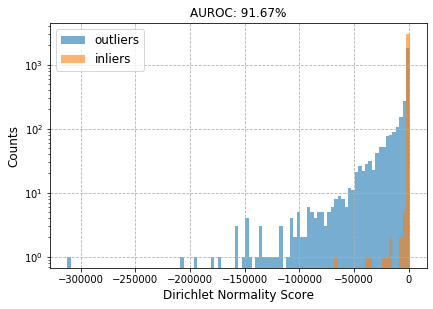

In [32]:
out_histogram(data_dict, bins=100)



-289.5569029563485
453.54602271105193


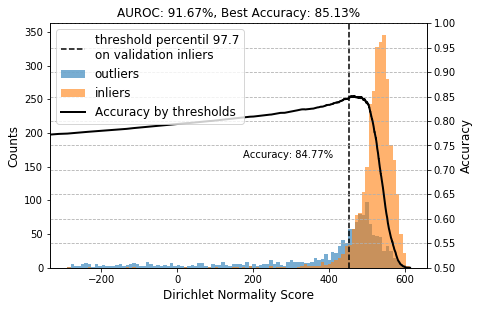

In [33]:
zoom_histogram(data_dict, percentile_perc=0.8, bins=100)  